In [0]:
#%tensorflow_version 1.x
!rm -r speech_data

In [0]:
from util import load_data, plot_graph, plot_confusion_matrix, model_maker

In [22]:
x_train,y_train,x_val,y_val,x_test,y_test,labels,ohe, DATA_PATH = load_data()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
up
three
four
stop
left
on
six
right
go
seven
no
one
off
yes
nine
zero
two
down
five
eight
Test Set X shape (8575, 8000)
Test Set Y shape (8575, 20)
Val Set X shape (8575, 8000)
Val Set Y shape (8575, 20)
Train Set X shape (25724, 8000)
Train Set Y shape (25724, 20)


In [23]:
from keras.layers import Dense

NUM_EPOCHS = 10
BATCH_SIZE = 32
EARLY_STOP_PATIENCE = 3

N_LAYERS = 1

layer_ = [None]*2
layers_info = [None]*N_LAYERS

for x in range(N_LAYERS): 
  layer_[0] = Dense
  layer_[1] = {'units':20,'input_dim':8000,'activation':'softmax'}
  layers_info[0] = layer_

model,fit_hist = model_maker(x_train,y_train,x_val,y_val,layers_info, DATA_PATH, NUM_EPOCHS, BATCH_SIZE, EARLY_STOP_PATIENCE)

score = model.evaluate(x_test, y_test,batch_size=BATCH_SIZE,verbose=1)

print("____TEST SET SCORES_____")
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], score[0]))

__--__
<class 'keras.layers.core.Dense'>
{'units': 20, 'input_dim': 8000, 'activation': 'softmax'}
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                160020    
Total params: 160,020
Trainable params: 160,020
Non-trainable params: 0
_________________________________________________________________
Train on 25724 samples, validate on 8575 samples
Epoch 1/10
25724/25724 [==============================] - 3s 125us/step - loss: 3.0298 - acc: 0.0667 - val_loss: 3.0405 - val_acc: 0.0764
Epoch 2/10
25724/25724 [==============================] - 3s 120us/step - loss: 2.7763 - acc: 0.1948 - val_loss: 3.1102 - val_acc: 0.0821
Epoch 3/10
25724/25724 [==============================] - 3s 121us/step - loss: 2.6380 - acc: 0.2432 - val_loss: 3.1838 - val_acc: 0.0800
Epoch 4/10
25724/25724 [==============================] - 3s 120us/step - loss: 

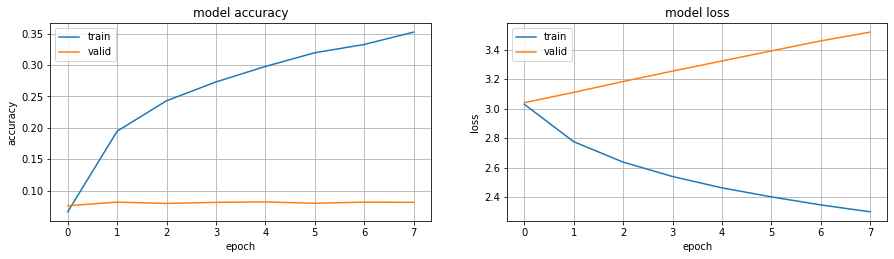

In [24]:
plot_graph(fit_hist)

8575/8575 [==============================] - 0s 57us/step


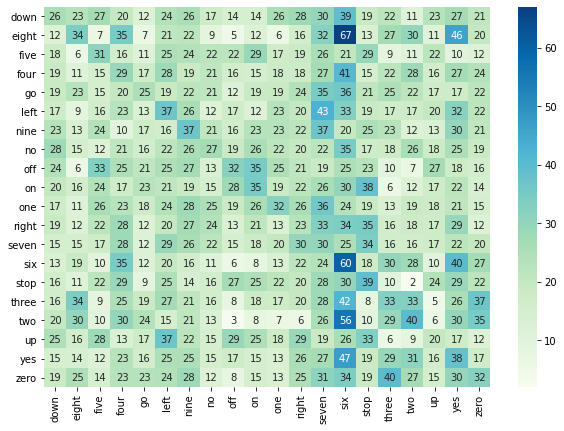

In [25]:
y_pred = model.predict(x_test,batch_size=BATCH_SIZE,verbose=1)
plot_confusion_matrix(y_pred,y_test,labels,ohe)